Some libraries to import

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import numpy as np

Choosing to work with the GPU for faster training

In [14]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')  # Use only the first GPU
    except RuntimeError as e:
        print(e)

Importing data

In [15]:
commands = []

with open('data1.txt', 'r') as file:
    for line in file:
      if line:
        commands.append(line.strip())

# commands

Tokenization

In [16]:
tokenizer = Tokenizer(filters='')
tokenizer.fit_on_texts(commands)

Sequencing

In [17]:
sequences = tokenizer.texts_to_sequences(commands)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

Input Output sequences

In [18]:
input_sequences = []
target_sequences = []

for seq in sequences:
    for i in range(1, len(seq)):
        input_sequences.append(seq[:i])
        target_sequences.append(seq[i])

Padding

In [19]:
max_seq_len = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='post')
target_sequences = np.array(target_sequences)

One-Hot encoding the target

In [20]:
# target_sequences = tf.keras.utils.to_categorical(target_sequences, num_classes=vocab_size)

Train_text spliting

In [21]:
x_train, x_test, y_train, y_test = train_test_split(input_sequences,target_sequences, test_size=0.2)

Model parameters

In [22]:
embedding_dim = 64
lstm_units = 128

Model building

In [23]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    LSTM(lstm_units, return_sequences=False),
    Dropout(rate=0.2),
    Dense(vocab_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Fitting to data

In [24]:
history = model.fit(x_train, y_train, epochs=50, batch_size=16, verbose=1, validation_data=(x_test, y_test))

Epoch 1/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.0508 - loss: 6.3843 - val_accuracy: 0.0563 - val_loss: 5.7449
Epoch 2/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0541 - loss: 5.5124 - val_accuracy: 0.0804 - val_loss: 5.4251
Epoch 3/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1132 - loss: 5.0239 - val_accuracy: 0.1477 - val_loss: 5.1510
Epoch 4/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1653 - loss: 4.6432 - val_accuracy: 0.1749 - val_loss: 5.0945
Epoch 5/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1806 - loss: 4.4979 - val_accuracy: 0.1487 - val_loss: 5.2281
Epoch 6/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1745 - loss: 4.4381 - val_accuracy: 0.1889 - val_loss: 4.9626
Epoch 7/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2042 - loss: 4.1949 - val_accuracy: 0.2221 - val_loss: 4.7913
Epoch 8/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2154 - loss: 4.0314 - val_accuracy: 0.

Extraction statistics

In [25]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

Graphs

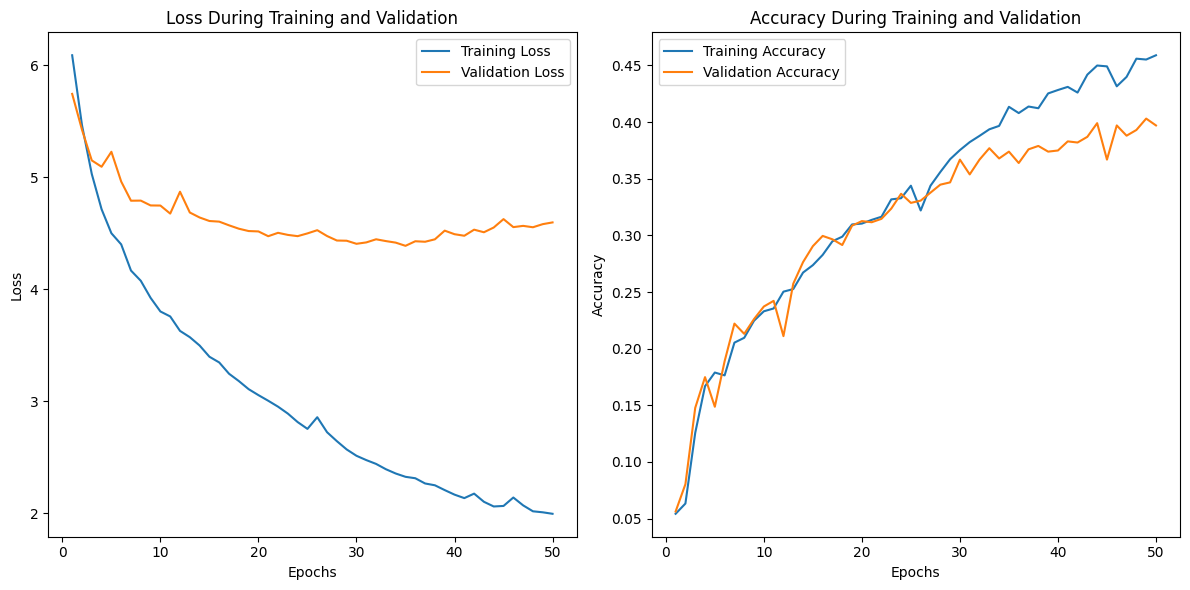

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Loss During Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Accuracy During Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Saving the model

In [27]:
model.save("lstm_model.keras")

Saving the tokenizer

In [28]:
import pickle

with open("lstm_tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)